   # DATA ANALYTICS ON INDIAN PREMIER LEAGUE MATCHES

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#reading data from a CSV file and rectifying errors in it
mat = pd.read_csv('matches.csv')
mat['toss_winner']=mat['toss_winner'].replace({'Rising Pune Supergiant':'Rising Pune Supergiants'})
mat['winner']=mat['winner'].replace({'Rising Pune Supergiant':'Rising Pune Supergiants'})

### Tosses and Matches won by each team

In [3]:
#counting toss win and match win for each team
count_toss=mat['toss_winner'].value_counts()
count_winner=mat['winner'].value_counts()
print('TOSSES WIN')
print(count_toss)
print('MATCHES WIN')
print(count_winner)
teams_toss=mat['toss_winner'].value_counts().index.tolist()
teams_winner=mat['winner'].value_counts().index.tolist()

TOSSES WIN
Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64
MATCHES WIN
Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Rising Pune Supergiants        15
Gujarat Lions                  13
Pune Warriors                  12
Kochi Tuskers Kerala            6
Name: winner, dtype: int64


Text(0.5, 1.0, 'TOSS WINNING STATISTICS')

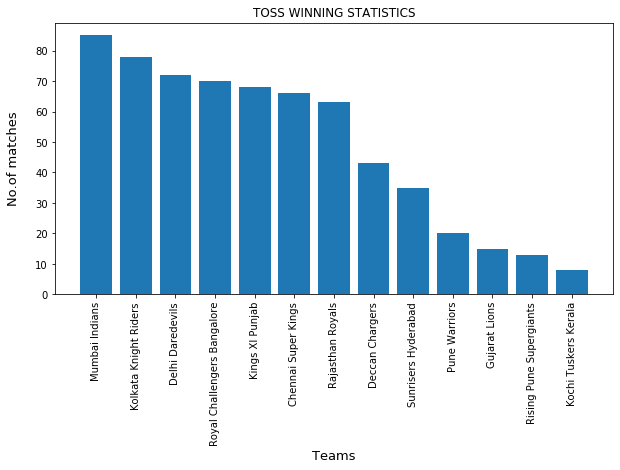

In [4]:
#toss winning statistics
plt.figure(figsize=(10,5))
plt.bar(teams_toss,count_toss)
plt.xticks(rotation=90)
plt.tick_params(axis='x',which='major' ,labelsize=10)
plt.tick_params(axis='y',which='major' ,labelsize=10)
plt.xlabel('Teams',fontsize=13)
plt.ylabel('No.of matches',labelpad=15,fontsize=13)
plt.title('TOSS WINNING STATISTICS')

Text(0.5, 1.0, 'MATCH WINNING STATISTICS')

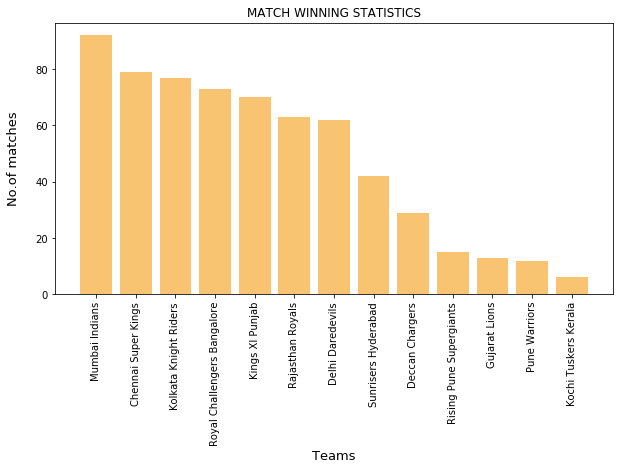

In [5]:
#match winning statistics
plt.figure(figsize=(10,5))
plt.bar(teams_winner,count_winner,color='#F8C471')
plt.xticks(rotation=90)
plt.tick_params(axis='x',which='major' ,labelsize=10)
plt.tick_params(axis='y',which='major' ,labelsize=10)
plt.xlabel('Teams',fontsize=13)
plt.ylabel('No.of matches',labelpad=15,fontsize=13)
plt.title('MATCH WINNING STATISTICS')

### Stadiums with maximum match occurance

In [6]:
#finding the top 10 stadiums with maximum match counts 
count_stadium=mat['venue'].value_counts().head(10)
stadium_names=mat['venue'].value_counts().head(10).index.tolist()

Text(0.5, 1.0, 'STADIUM-MATCH OCCURENCE')

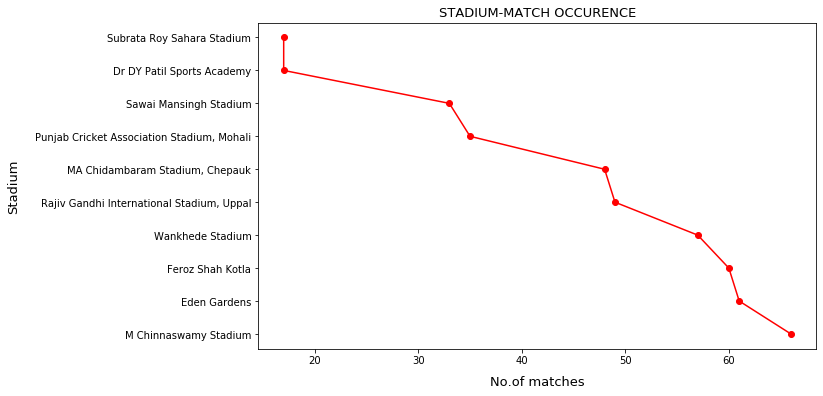

In [7]:
plt.figure(figsize=(10,6))
plt.plot(count_stadium,stadium_names,'r-',marker='o')
plt.tick_params(axis='x',which='major' ,labelsize=10)
plt.tick_params(axis='y',which='major' ,labelsize=10)
plt.ylabel('Stadium',labelpad=15,fontsize=13)
plt.xlabel('No.of matches',labelpad=10,fontsize=13)
plt.title('STADIUM-MATCH OCCURENCE',fontsize=13)

### Count of bat/bowl decision by each team on winning the toss

In [8]:
#decision on toss win based on teams
teamwise_decision=mat.groupby(['toss_winner','toss_decision']).size().index.tolist()
decision_count=mat.groupby(['toss_winner','toss_decision']).size()
print(decision_count)
bat=[]
for i in range(0,len(decision_count),2):
    bat.append(decision_count[i])
bowl=[]
for i in range(1,len(decision_count),2):
    bowl.append(decision_count[i])
teams_order=[]
for i in range(0,len(teamwise_decision),2):
    teams_order.append(teamwise_decision[i][0])

toss_winner                  toss_decision
Chennai Super Kings          bat              44
                             field            22
Deccan Chargers              bat              24
                             field            19
Delhi Daredevils             bat              26
                             field            46
Gujarat Lions                bat               1
                             field            14
Kings XI Punjab              bat              25
                             field            43
Kochi Tuskers Kerala         bat               3
                             field             5
Kolkata Knight Riders        bat              30
                             field            48
Mumbai Indians               bat              40
                             field            45
Pune Warriors                bat              11
                             field             9
Rajasthan Royals             bat              28
                          

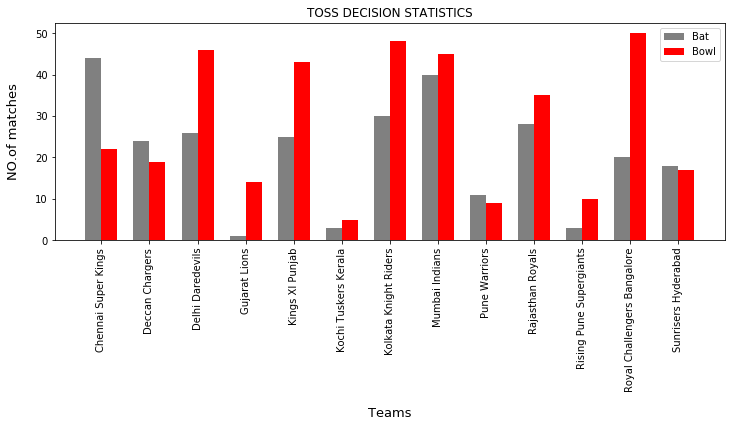

In [9]:
ind=np.arange(0,39,3)
fig=plt.figure()
fig.set_figheight(4)
fig.set_figwidth(12)
ax=fig.add_subplot()
ax.set_xlabel('Teams',labelpad=15,fontsize=13)
ax.set_ylabel('NO.of matches',labelpad=15,fontsize=13)
ax.set_title('TOSS DECISION STATISTICS')
ax.bar(ind,bat,color='grey',width=1,label='Bat')
ax.bar(ind+1,bowl,color='red',width=1,label='Bowl')
ax.set_xticks(ind+0.5)
ax.set_xticklabels(teams_order,rotation=90)
ax.legend()

In [11]:
deli = pd.read_csv('deliveries.csv')
#this dataset contains ball by ball records from IPL-2008 to IPL-2017

### Top run scorers

In [12]:
#finding the total runs scored by each player and finding the maximum among them
result=deli.groupby(['batsman'])
player_runs=dict()
for batsman,group in result:
    runs=result.get_group(batsman).batsman_runs.sum()
    player_runs.setdefault(batsman,runs)
sort=sorted(player_runs.items(),reverse=True,key=lambda x: x[1])
batsman=[]
batsman_runs=[]
for i in dict(sort).keys():
    batsman.append(i)
for i in dict(sort).values():
    batsman_runs.append(i) 

Text(0.5, 1.0, 'RUNS BY AN INDIVIDUAL')

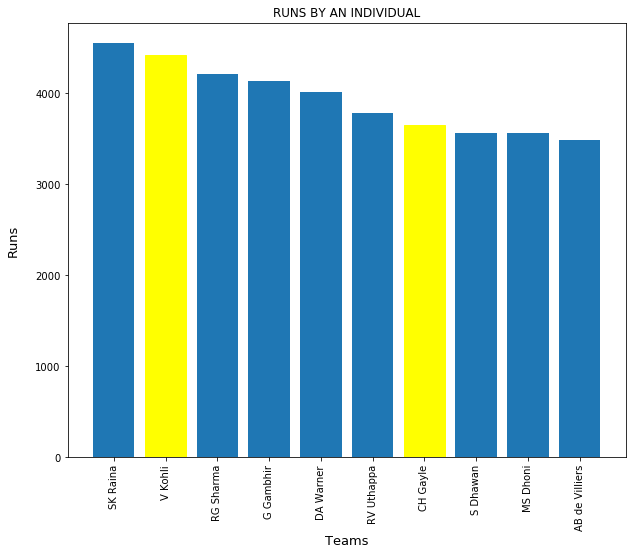

In [13]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
barplot=plt.bar(batsman[:10],batsman_runs[:10])
barplot[1].set_color('yellow')
barplot[6].set_color('yellow')
plt.xlabel('Teams',fontsize=13)
plt.ylabel('Runs',labelpad=15,fontsize=13)
plt.title('RUNS BY AN INDIVIDUAL')

### Number of matches played by each team

In [14]:
#finding the number of matches played by each team
mat['team1']=mat['team1'].replace({'Rising Pune Supergiant':'Rising Pune Supergiants'})
mat['team2']=mat['team2'].replace({'Rising Pune Supergiant':'Rising Pune Supergiants'})
mp=mat.groupby('team1').size()+mat.groupby('team2').size()
tl=mat.groupby('team1').size().index.tolist()
print(mp)

team1
Chennai Super Kings            131
Deccan Chargers                 75
Delhi Daredevils               147
Gujarat Lions                   30
Kings XI Punjab                148
Kochi Tuskers Kerala            14
Kolkata Knight Riders          148
Mumbai Indians                 157
Pune Warriors                   46
Rajasthan Royals               118
Rising Pune Supergiants         30
Royal Challengers Bangalore    152
Sunrisers Hyderabad             76
dtype: int64


Text(0.5, 1.0, 'MATCHES PLAYED STATISTICS')

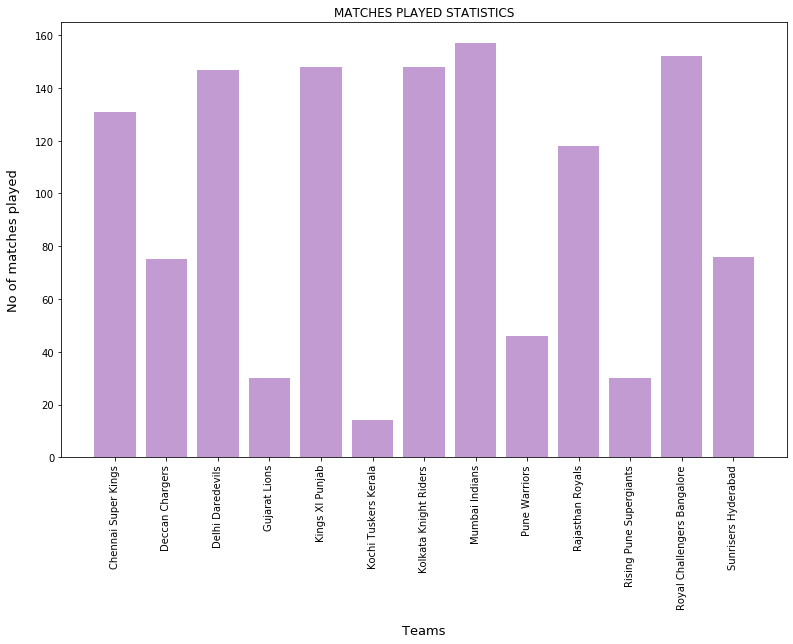

In [15]:
plt.figure(figsize=(13,8))
plt.bar(tl,mp,color='#C39BD3')
plt.xticks(rotation='vertical')
plt.xlabel('Teams',labelpad=15,fontsize=13)
plt.ylabel('No of matches played',labelpad=15,fontsize=13)
plt.tick_params(axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)
plt.title('MATCHES PLAYED STATISTICS')

### Probablity of winning the match by winning the toss

In [16]:
#implementing conditional probablity (probablity of winning the match by winning the toss)
tw_count=[]
mat_count=[]
t_count=[]
p_t=[]
p_teams=mat.team1.unique().tolist()
for i in mat.team1.unique().tolist():
    tw_count.append((((mat['toss_winner'] == i) & (mat['winner'] == i)).tolist().count(True)))
    mat_count.append(((mat['team1']==i) | (mat['team2']==i)).tolist().count(True))
    t_count.append((mat['toss_winner']==i).tolist().count(True))

p_tw=[]
for i in range(len(mat_count)):
    p_tw.append(tw_count[i]/mat_count[i])
    p_t.append(t_count[i]/mat_count[i])
    
print(p_tw)
print(p_t)

p_result=[]
for i in range(len(p_tw)):
    p_result.append(p_tw[i]/p_t[i]*100)
print(p_result)

[0.2236842105263158, 0.3057324840764331, 0.3333333333333333, 0.26666666666666666, 0.23026315789473684, 0.2972972972972973, 0.22448979591836735, 0.1891891891891892, 0.32061068702290074, 0.288135593220339, 0.25333333333333335, 0.2857142857142857, 0.06521739130434782]
[0.4605263157894737, 0.5414012738853503, 0.5, 0.43333333333333335, 0.4605263157894737, 0.527027027027027, 0.4897959183673469, 0.4594594594594595, 0.5038167938931297, 0.5338983050847458, 0.5733333333333334, 0.5714285714285714, 0.43478260869565216]
[48.57142857142857, 56.470588235294116, 66.66666666666666, 61.53846153846153, 50.0, 56.41025641025642, 45.833333333333336, 41.17647058823529, 63.63636363636363, 53.96825396825397, 44.18604651162791, 50.0, 15.0]


Text(0, 0.5, 'Probablity of winning match by winning toss')

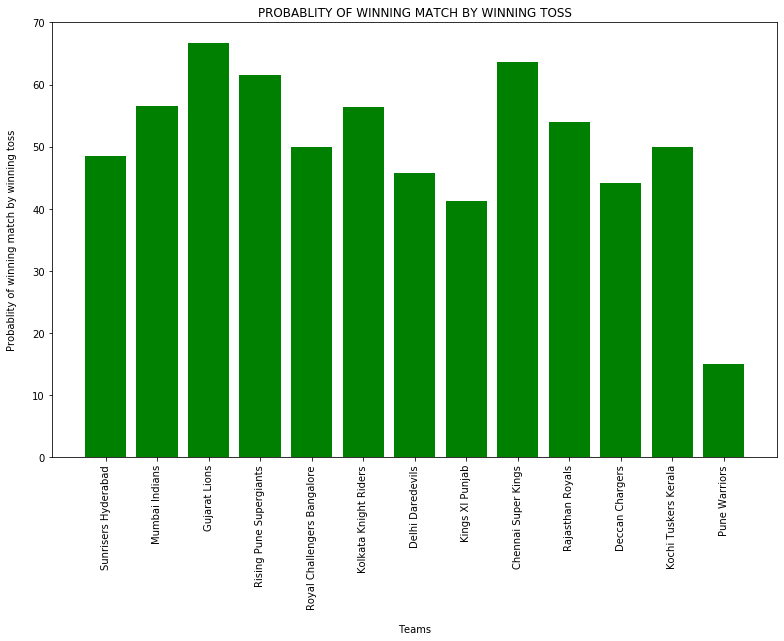

In [17]:
plt.figure(figsize=(13,8))
plt.bar(p_teams,p_result,color='g')
plt.xticks(rotation=90,fontsize=10)
plt.title('PROBABLITY OF WINNING MATCH BY WINNING TOSS')
plt.xlabel('Teams',labelpad=15,fontsize=10)
plt.ylabel('Probablity of winning match by winning toss',labelpad=15,fontsize=10)

### Percentage of teams electing to bat in every season

In [18]:
p=mat.groupby('season')
seasons=[]
dec_bat=[]
percentage_bat=[]
for i in range(2008,2018,1):
    seasons.append(i)
    
#couting number of teams won the toss and elected to bat first in each season of IPL
for i in range(len(seasons)):
    q=p.get_group(seasons[i])
    dec_bat.append(q['toss_decision'].tolist().count('bat'))

#counting number of matches in each season 
match_per_season=p.size().tolist()

#finding percentage of teams electing to bat in every season
for i in range(len(dec_bat)):
    percentage_bat.append(dec_bat[i]/match_per_season[i]*100)
print(percentage_bat)

[44.827586206896555, 61.40350877192983, 65.0, 34.24657534246575, 50.0, 59.210526315789465, 31.666666666666664, 42.3728813559322, 18.333333333333332, 18.64406779661017]


Text(0.5, 0, 'Seasons')

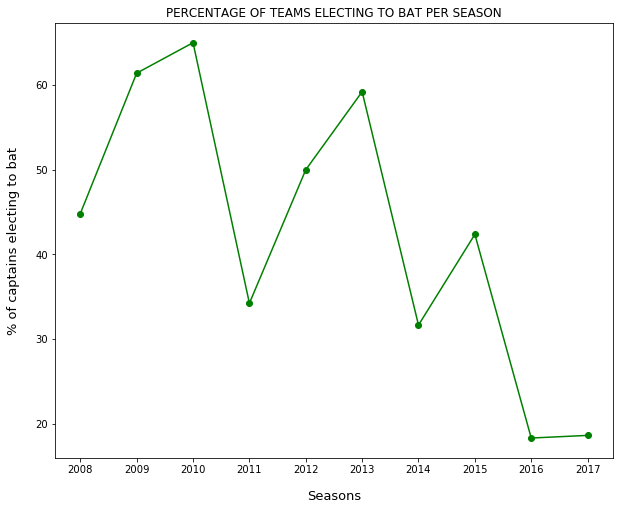

In [19]:
plt.figure(figsize=(10,8))
plt.plot(seasons,percentage_bat,marker='o',color='green')
plt.xticks(np.arange(2008,2018,1))
plt.title('PERCENTAGE OF TEAMS ELECTING TO BAT PER SEASON')
plt.ylabel('% of captains electing to bat',labelpad=15,fontsize=13)
plt.xlabel('Seasons',labelpad=15,fontsize=13)

### Number of man of the match awards received by each player

CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
RG Sharma         14
                  ..
NV Ojha            1
PP Ojha            1
JEC Franklin       1
LJ Wright          1
KK Cooper          1
Name: player_of_match, Length: 201, dtype: int64

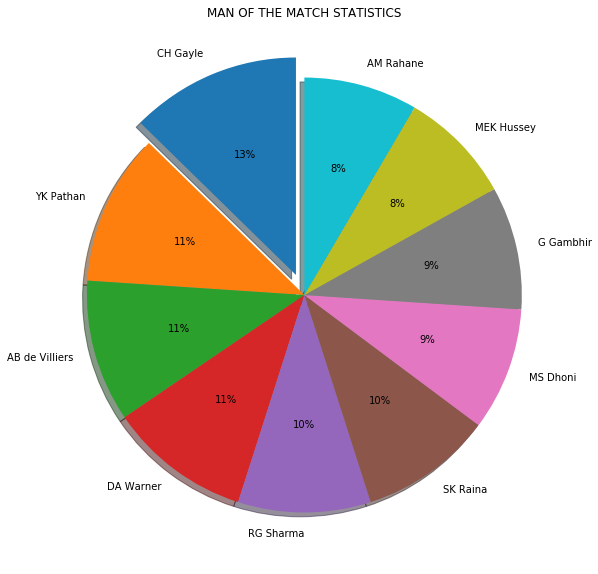

In [20]:
#counting the number of man of the match awards received by each player
pom_count = mat['player_of_match'].value_counts()
pom = pom_count.index.tolist()

#plotting the data of top 10 players
plt.figure(figsize=(10,10))
plt.pie(pom_count.head(10),labels=pom[:10],autopct='%.0f%%',explode=(0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0),shadow=True,startangle=90)
plt.title('MAN OF THE MATCH STATISTICS')
pom_count

### Strike Rate of batsmen

In [21]:
#finding the top batsmen based on their strike rate(runs_scored/balls_faced*100)
result=deli.groupby(['batsman'])
player_details=dict()
for batsman,group in result:
    runs=result.get_group(batsman).batsman_runs.sum()
    balls=result.get_group(batsman).batsman_runs.count()
    sr=runs/balls*100
    player_details.setdefault(batsman,[runs,balls,sr])
player_details=dict(sorted(player_details.items(),reverse=True,key=lambda x: x[1][2]))
bats_name=[]
bats_sr=[]
bat_sts=list(player_details.items())
for i in range(len(bat_sts)):
    bats_name.append(bat_sts[i][0])
    bats_sr.append(bat_sts[i][1][2])

Text(0.5, 1.0, 'SR of players')

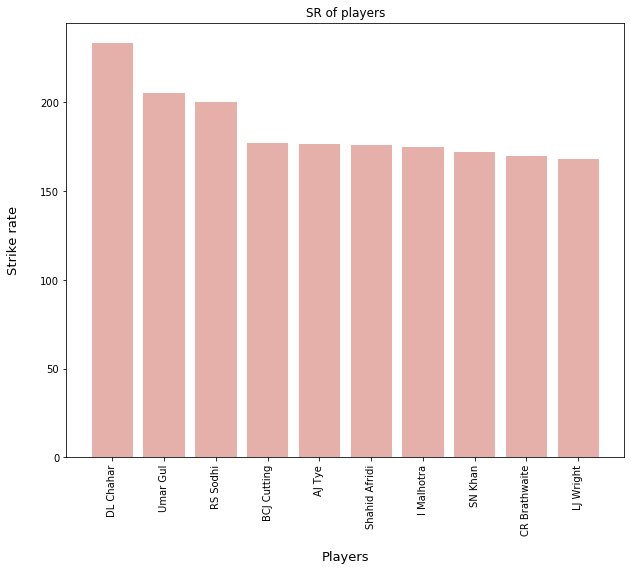

In [22]:
plt.figure(figsize=(10,8))
plt.bar(bats_name[:10],bats_sr[:10],color='#E6B0AA')
plt.xticks(rotation='90')
plt.xlabel('Players',labelpad=15,fontsize=13)
plt.ylabel('Strike rate',labelpad=20,fontsize=13)
plt.title('SR of players')

### Average score of batsmen

In [23]:
#finding the top batsmen based on their average(runs/no.of dismissals)
outs=deli['player_dismissed'].value_counts().tolist()
bat_out=deli['player_dismissed'].value_counts().index.tolist()
d_batout={}
for i in range(len(outs)):
    d_batout.setdefault(bat_out[i],outs[i])
run=deli.groupby('batsman')
bl=run['batsman_runs'].sum().index.tolist()
br=run['batsman_runs'].sum().tolist()
bat_run={}
for i in range(len(bl)):
    bat_run.setdefault(bl[i],br[i])
average_bat={}
for i in d_batout.keys():
    if i in bat_run:
        average_bat.setdefault(i,bat_run[i]/d_batout[i])
result_avg=dict(sorted(average_bat.items(),reverse=True,key= lambda x:x[1]))            
result_avg_names=list(result_avg.keys())
result_avg_scores=list(result_avg.values())


Text(0, 0.5, 'Batsmen')

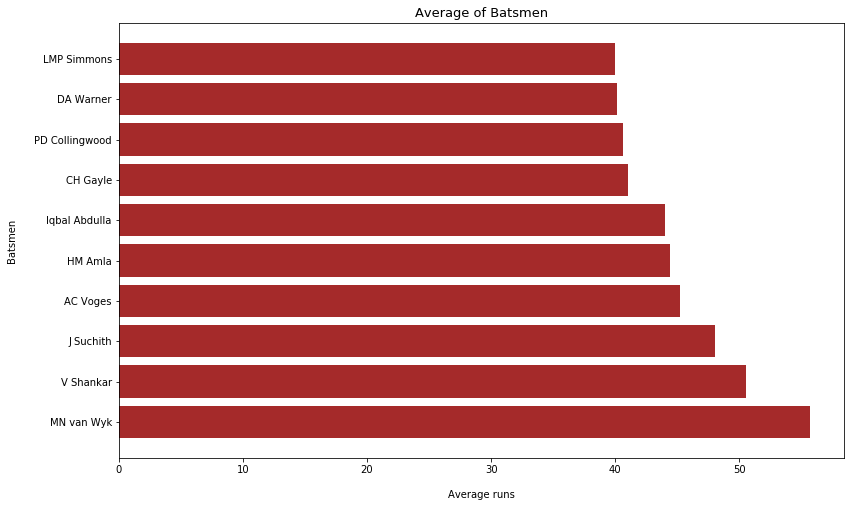

In [24]:
plt.figure(figsize=(13,8))
plt.title('Average of Batsmen',fontsize=13)
plt.barh(result_avg_names[:10],result_avg_scores[:10],color='brown')
plt.xlabel('Average runs',labelpad=15)
plt.ylabel('Batsmen',labelpad=17)

### Season wise wins of all teams

In [25]:
ipl_season=mat.groupby('season')
seasons=list(np.arange(2008,2018,1))
li=[]
for i in seasons:
    temp=ipl_season.get_group(i)
    l1=temp['winner'].value_counts().tolist()
    l2=temp['winner'].value_counts().index.tolist()
    for j in range(len(l1)):
        li.append(tuple([i,l2[j],l1[j]]))            

In [26]:
teams_wins={
    'Sunrisers Hyderabad':[],
    'Rising Pune Supergiants':[],
    'Kolkata Knight Riders':[],
    'Kings XI Punjab':[],
    'Royal Challengers Bangalore':[],
    'Mumbai Indians':[],
    'Delhi Daredevils':[],
    'Gujarat Lions':[],
    'Chennai Super Kings':[],
    'Rajasthan Royals':[],
    'Deccan Chargers':[],
    'Pune Warriors':[],
    'Kochi Tuskers Kerala':[]
}
teams=mat['winner'].unique().tolist()    
teams=teams[:-1]
for i in teams:
    for j in seasons:
        for k in li:
            if(k[0]==j and k[1]==i):
                teams_wins[i].append(k[2])
                break
        else:
            teams_wins[i].append(0)

In [27]:
teams_wins

{'Sunrisers Hyderabad': [0, 0, 0, 0, 0, 10, 6, 7, 11, 8],
 'Rising Pune Supergiants': [0, 0, 0, 0, 0, 0, 0, 0, 5, 10],
 'Kolkata Knight Riders': [6, 3, 7, 8, 12, 6, 11, 7, 8, 9],
 'Kings XI Punjab': [10, 7, 4, 7, 8, 8, 12, 3, 4, 7],
 'Royal Challengers Bangalore': [4, 9, 8, 10, 8, 9, 5, 8, 9, 3],
 'Mumbai Indians': [7, 5, 11, 10, 10, 13, 7, 10, 7, 12],
 'Delhi Daredevils': [7, 10, 7, 4, 11, 3, 2, 5, 7, 6],
 'Gujarat Lions': [0, 0, 0, 0, 0, 0, 0, 0, 9, 4],
 'Chennai Super Kings': [9, 8, 9, 11, 10, 12, 10, 10, 0, 0],
 'Rajasthan Royals': [13, 6, 6, 6, 7, 11, 7, 7, 0, 0],
 'Deccan Chargers': [2, 9, 8, 6, 4, 0, 0, 0, 0, 0],
 'Pune Warriors': [0, 0, 0, 4, 4, 4, 0, 0, 0, 0],
 'Kochi Tuskers Kerala': [0, 0, 0, 6, 0, 0, 0, 0, 0, 0]}

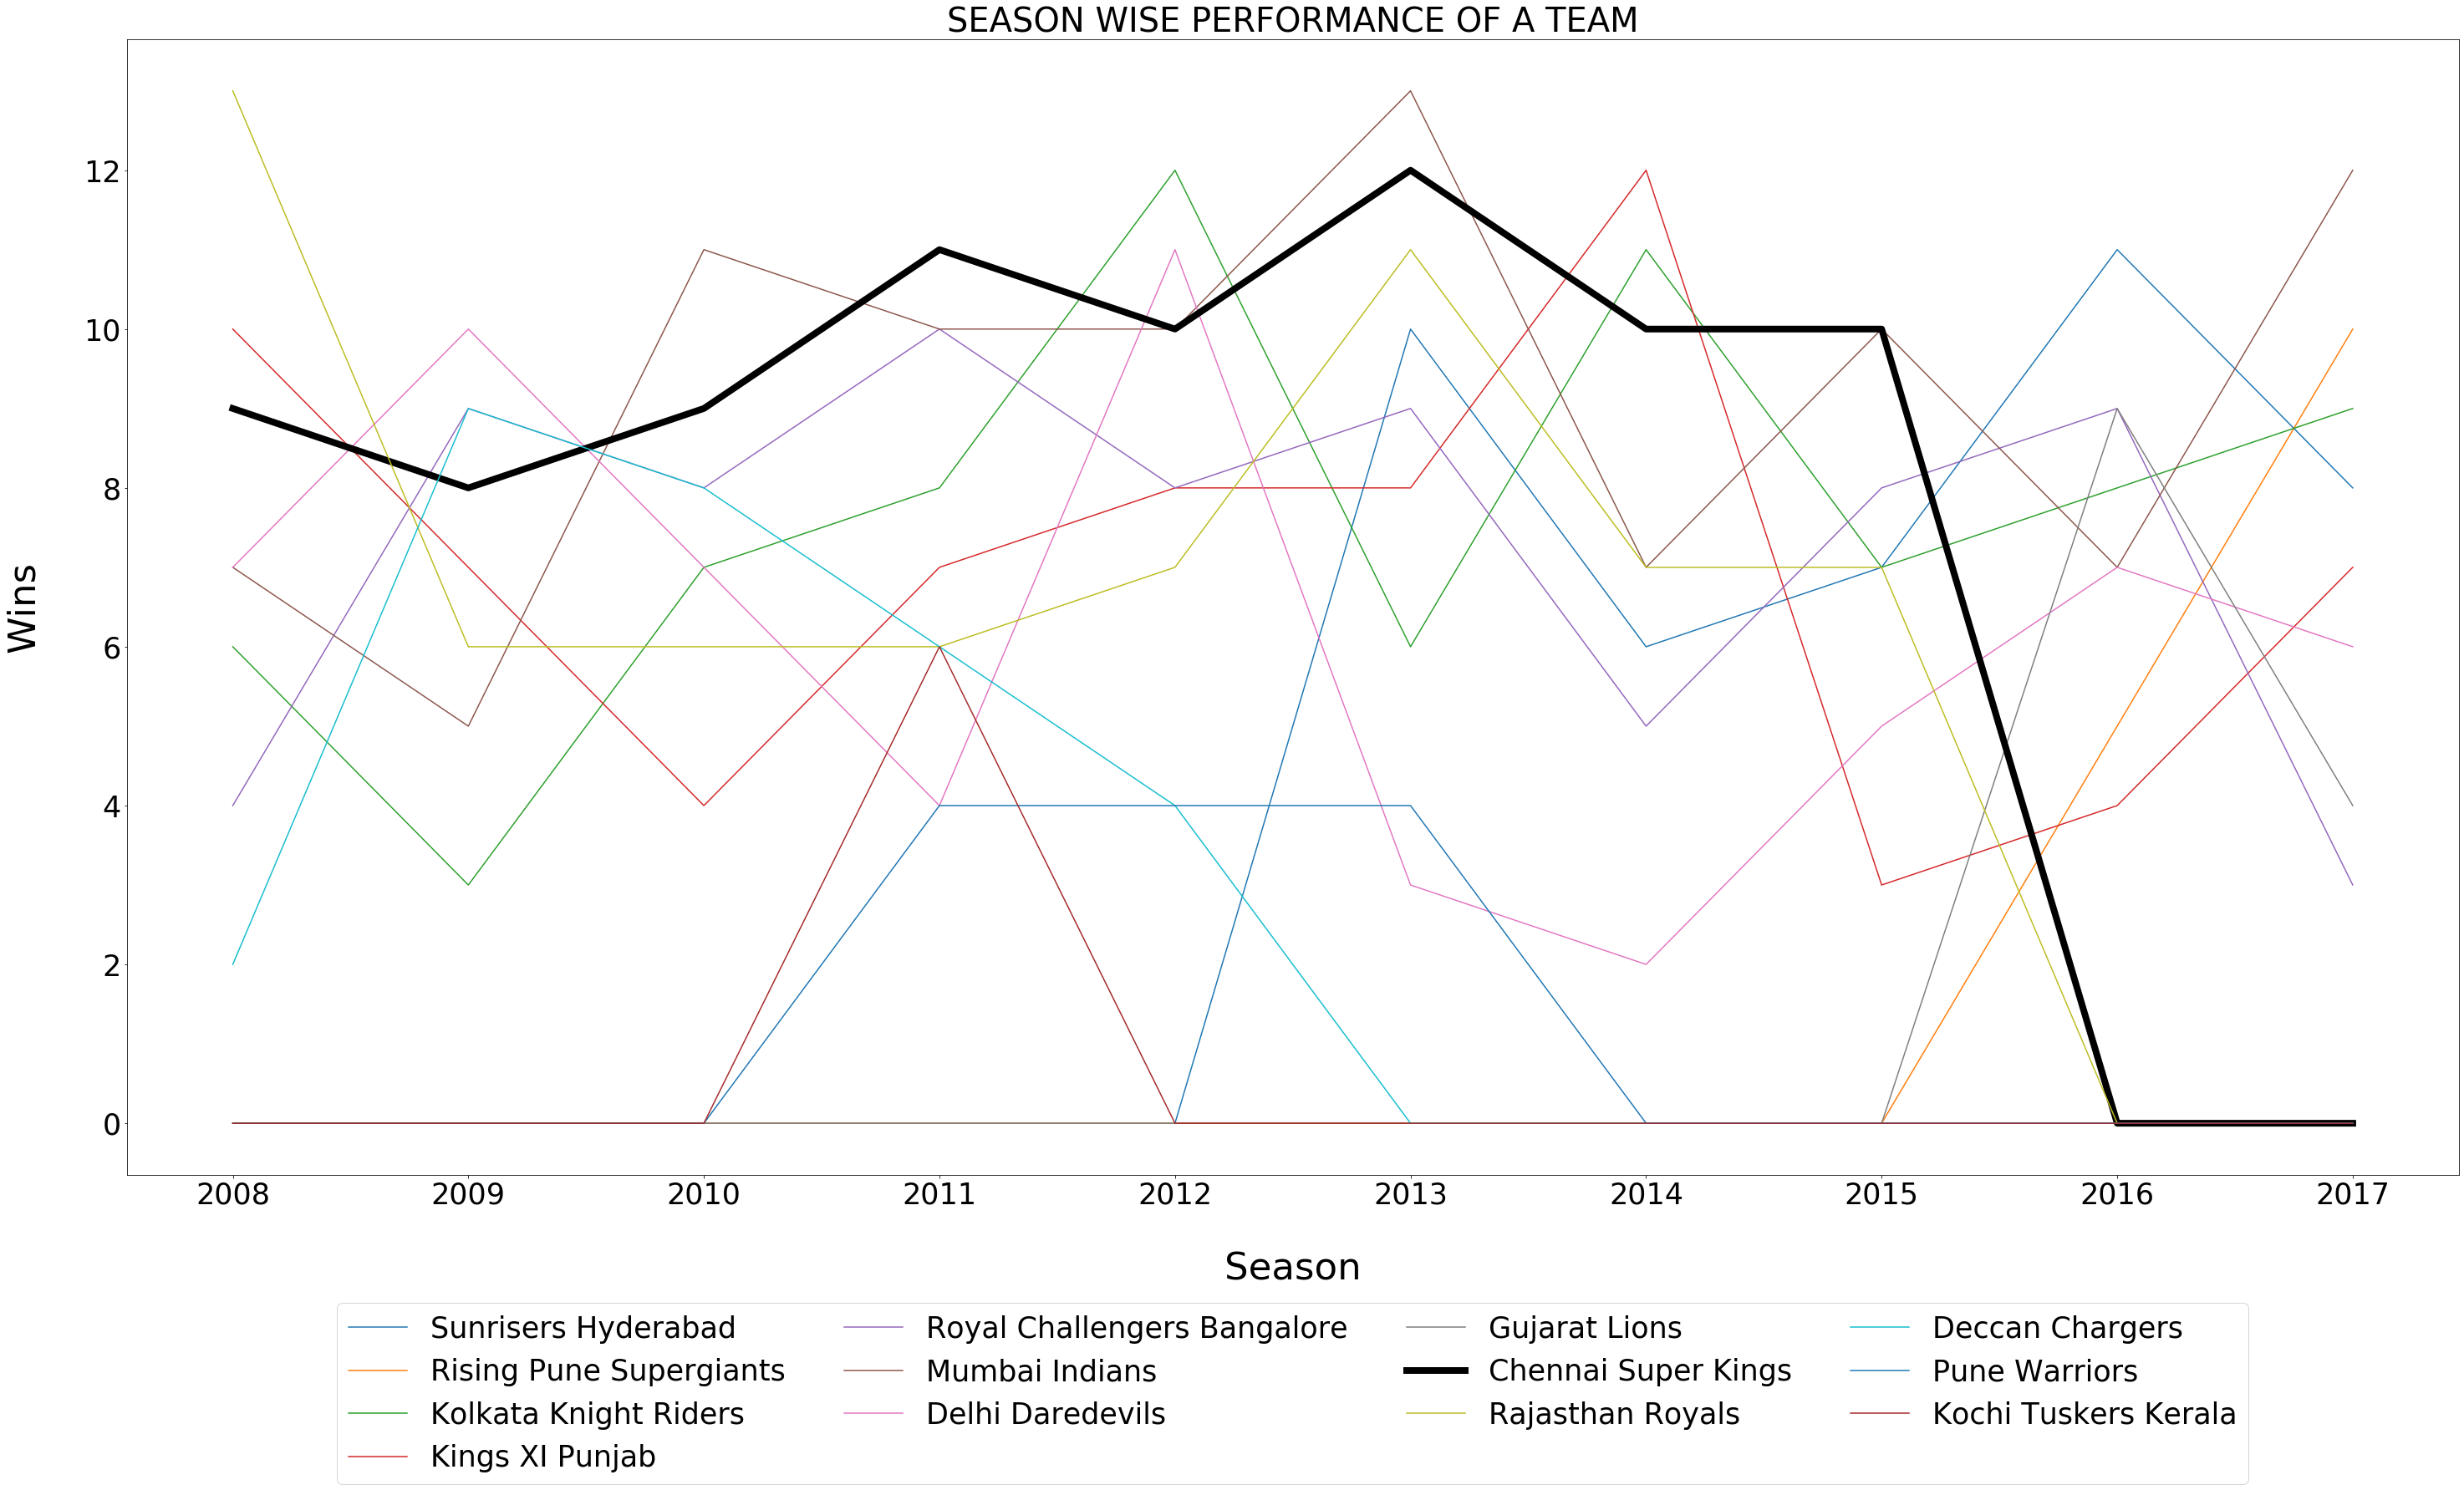

In [40]:
plt.figure(figsize=(50,25))
plt.title('SEASON WISE PERFORMANCE OF A TEAM',fontsize=40)
plt.plot(seasons,teams_wins['Sunrisers Hyderabad'])
plt.plot(seasons,teams_wins['Rising Pune Supergiants'])
plt.plot(seasons,teams_wins['Kolkata Knight Riders'])
plt.plot(seasons,teams_wins['Kings XI Punjab'])
plt.plot(seasons,teams_wins['Royal Challengers Bangalore'])
plt.plot(seasons,teams_wins['Mumbai Indians'])
plt.plot(seasons,teams_wins['Delhi Daredevils'])
plt.plot(seasons,teams_wins['Gujarat Lions'])
plt.plot(seasons,teams_wins['Chennai Super Kings'],color='black',linewidth=8)
plt.plot(seasons,teams_wins['Rajasthan Royals'])
plt.plot(seasons,teams_wins['Deccan Chargers'])
plt.plot(seasons,teams_wins['Pune Warriors'])
plt.plot(seasons,teams_wins['Kochi Tuskers Kerala'],color='brown')
plt.xticks(np.arange(2008,2018,1),fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel('Season',fontsize=45,labelpad=50)
plt.ylabel('Wins',fontsize=45,labelpad=50)
plt.legend(teams_wins.keys(),fontsize=35,loc='upper center',bbox_to_anchor=(0.5,-0.1),ncol=4)
plt.show()